<a href="https://colab.research.google.com/github/urmilapol/urmilapolprojects/blob/master/pandabear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.vision import *

In [3]:
path = Path("content//sample_data")
print(path)
for file, folder in [('panda.csv', 'panda'), ('bear.csv', 'bear')
                    ]:
    dest = path/folder # path + '/' + folder
    dest.mkdir(parents=True, exist_ok=True)
    download_images(path/file, dest)

content/sample_data


Error "https://natgeo.imgix.net/syndication/d03e14b9-ccf2-40d2-9612-997a20d35b4a/magazine-rights-exempt-2016-08-departments-panda-mania-12.jpg?auto=compress,format&w=1024&h=560&fit=crop" No connection adapters were found for '"https://natgeo.imgix.net/syndication/d03e14b9-ccf2-40d2-9612-997a20d35b4a/magazine-rights-exempt-2016-08-departments-panda-mania-12.jpg?auto=compress,format&w=1024&h=560&fit=crop"'
Error "https://m.media-amazon.com/images/M/MV5BNjJiMmFjMDQtNmFjMi00ZTE5LTg4NzQtNTllZDJkNmFmNzVkXkEyXkFqcGdeQXVyMTkxNjUyNQ@@._V1_UX477_CR0,0,477,268_AL_.jpg" No connection adapters were found for '"https://m.media-amazon.com/images/M/MV5BNjJiMmFjMDQtNmFjMi00ZTE5LTg4NzQtNTllZDJkNmFmNzVkXkEyXkFqcGdeQXVyMTkxNjUyNQ@@._V1_UX477_CR0,0,477,268_AL_.jpg"'
Error https://quantdare.com/wp-content/uploads/2017/09/Pandas-e1506583057998.jpg ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response',))
Error "https://images-na.ssl-images-amazon.com/images/I/51iifQbCAYL._

Error "https://lumiere-a.akamaihd.net/v1/images/gallery_bears_thumbnail_1a557998.jpeg?region=0,0,450,338" No connection adapters were found for '"https://lumiere-a.akamaihd.net/v1/images/gallery_bears_thumbnail_1a557998.jpeg?region=0,0,450,338"'
Error "https://m.media-amazon.com/images/M/MV5BMjU5ZmUwNmMtNTI1My00YTNiLTkxNDAtODMzMTUxZjlkNGY5XkEyXkFqcGdeQXVyNzU1NzE3NTg@._V1_CR0,45,480,270_AL_UX477_CR0,0,477,268_AL_.jpg" No connection adapters were found for '"https://m.media-amazon.com/images/M/MV5BMjU5ZmUwNmMtNTI1My00YTNiLTkxNDAtODMzMTUxZjlkNGY5XkEyXkFqcGdeQXVyNzU1NzE3NTg@._V1_CR0,45,480,270_AL_UX477_CR0,0,477,268_AL_.jpg"'


In [4]:
for folder in ('panda', 'bear'):
    print(folder)
    verify_images(path/folder, delete=True, max_size=500)

panda


cannot identify image file <_io.BufferedReader name='content/sample_data/panda/00000065.jpg'>
cannot identify image file <_io.BufferedReader name='content/sample_data/panda/00000014.jpg'>
cannot identify image file <_io.BufferedReader name='content/sample_data/panda/00000097.jpg'>
bear


cannot identify image file <_io.BufferedReader name='content/sample_data/bear/00000088.jpg'>
cannot identify image file <_io.BufferedReader name='content/sample_data/bear/00000056.jpg'>
cannot identify image file <_io.BufferedReader name='content/sample_data/bear/00000085.jpg'>
cannot identify image file <_io.BufferedReader name='content/sample_data/bear/00000060.jpg'>
cannot identify image file <_io.BufferedReader name='content/sample_data/bear/00000019.jpg'>
cannot identify image file <_io.BufferedReader name='content/sample_data/bear/00000044.jpg'>
cannot identify image file <_io.BufferedReader name='content/sample_data/bear/00000045.jpg'>
cannot identify image file <_io.BufferedReader name='content/sample_data/bear/00000086.jpg'>


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)


In [7]:
data.classes

['bear', 'panda']

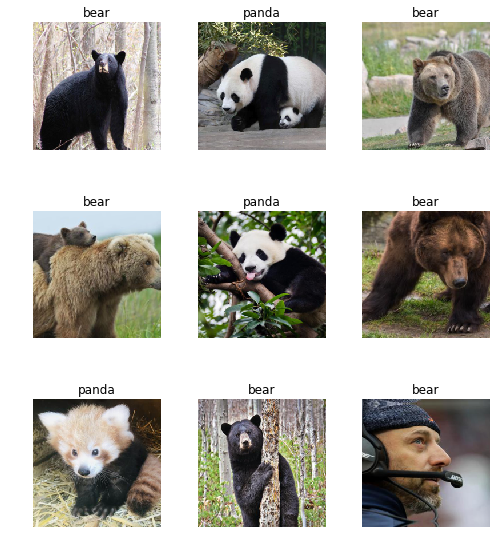

In [8]:
data.show_batch(rows=3, figsize=(7, 8))

In [9]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['bear', 'panda'], 2, 144, 36)

In [10]:
learn = create_cnn(data, models.resnet34, metrics=[error_rate, accuracy])

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 115927690.73it/s]


In [11]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.827021,0.412382,0.250000,0.750000,00:55
1,0.634530,0.079347,0.000000,1.000000,00:57
2,0.479023,0.031246,0.000000,1.000000,00:56
3,0.367507,0.022374,0.000000,1.000000,00:57
4,0.303829,0.020302,0.000000,1.000000,00:56


In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [0]:
losses,idxs = interp.top_losses()

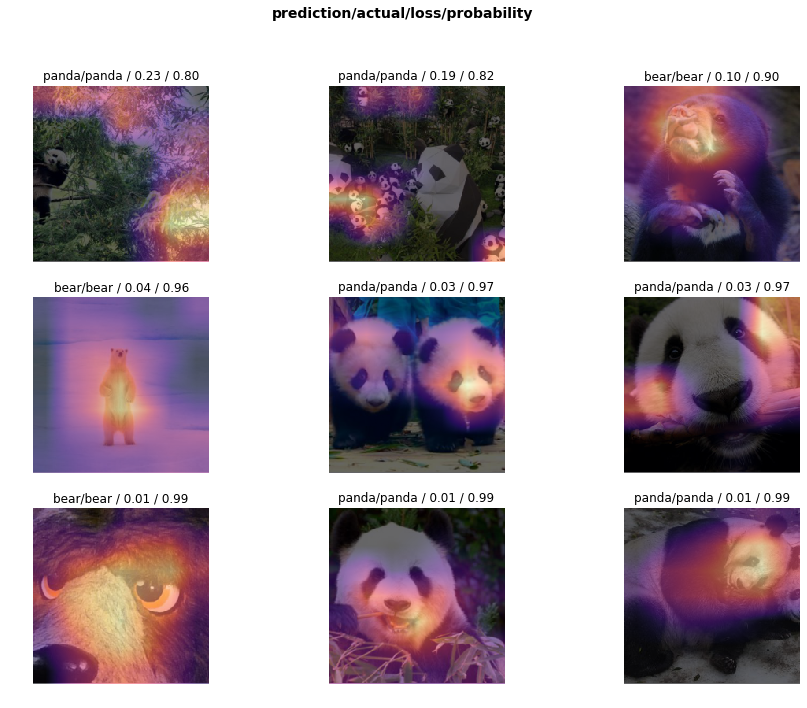

In [14]:
interp.plot_top_losses(9, figsize=(15,11))

In [0]:
from fastai.widgets import *

In [0]:
ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Valid)

In [0]:
learn.export()

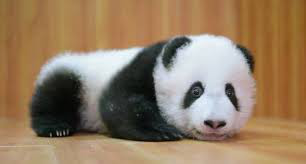

In [18]:
img = open_image(path/'test3.jpg')
img

In [0]:
learn = load_learner(path)

In [20]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category panda

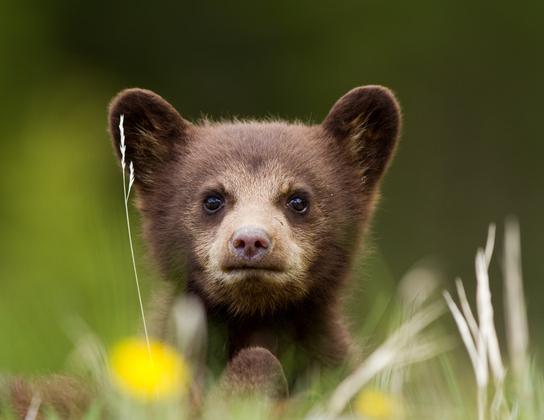

In [23]:
img = open_image(path/'test4.jpeg')
img

In [0]:
learn = load_learner(path)

In [25]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category panda

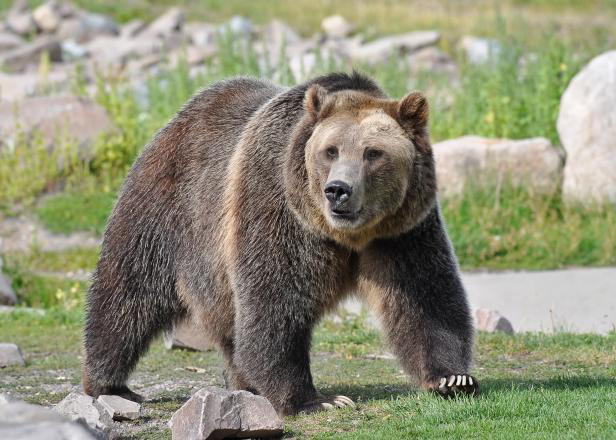

In [26]:
img = open_image(path/'test5.jpeg')
img

In [0]:
learn = load_learner(path)

In [28]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category bear